In [42]:
import pandas as pd
import numpy as np
import glob
import json
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import naive_bayes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import scipy.stats as stats
cmap = ListedColormap(sns.color_palette("husl", len(gs_RF.classes_)))

In [2]:
# using the glob package, read each json file in each match folder
# can't put all the match files in the same one as some have the same names
# read each file as a dataframe and then concatenate to make one big one for all files in a folder

all_files_11 = glob.glob('/Users/nicklavender/Desktop/DSI20-lessons/open-data/data/matches/11/*')
df_11_temp = (pd.read_json(file) for file in all_files_11)
df_11 = pd.concat(df_11_temp)

all_files_2 = glob.glob('/Users/nicklavender/Desktop/DSI20-lessons/open-data/data/matches/2/*')
df_2_temp = (pd.read_json(file) for file in all_files_2)
df_2 = pd.concat(df_2_temp)

all_files_16 = glob.glob('/Users/nicklavender/Desktop/DSI20-lessons/open-data/data/matches/16/*')
df_16_temp = (pd.read_json(file) for file in all_files_16)
df_16 = pd.concat(df_16_temp)

all_files_37 = glob.glob('/Users/nicklavender/Desktop/DSI20-lessons/open-data/data/matches/37/*')
df_37_temp = (pd.read_json(file) for file in all_files_37)
df_37 = pd.concat(df_37_temp)

all_files_43 = glob.glob('/Users/nicklavender/Desktop/DSI20-lessons/open-data/data/matches/43/*')
df_43_temp = (pd.read_json(file) for file in all_files_43)
df_43 = pd.concat(df_43_temp)

all_files_49 = glob.glob('/Users/nicklavender/Desktop/DSI20-lessons/open-data/data/matches/49/*')
df_49_temp = (pd.read_json(file) for file in all_files_49)
df_49 = pd.concat(df_49_temp)

all_files_55 = glob.glob('/Users/nicklavender/Desktop/DSI20-lessons/open-data/data/matches/55/*')
df_55_temp = (pd.read_json(file) for file in all_files_55)
df_55 = pd.concat(df_55_temp)

all_files_72 = glob.glob('/Users/nicklavender/Desktop/DSI20-lessons/open-data/data/matches/72/*')
df_72_temp = (pd.read_json(file) for file in all_files_72)
df_72 = pd.concat(df_72_temp)

In [3]:
# concat the individual folder dfs to make a complete one
#reset index as it goes by each file at the moment
df_final_unflat = pd.concat([df_2,df_11,df_16,df_37,df_43,df_49,df_55,df_72])
df_final_unflat.reset_index(inplace=True)
df_final_unflat.head()

,index,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,metadata,match_week,competition_stage,stadium,referee
0,0,3749052,2004-02-07,16:00:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 46, 'home_team_name': 'Wolver...","{'away_team_id': 1, 'away_team_name': 'Arsenal...",1,3,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,"{'data_version': '1.1.0', 'shot_fidelity_versi...",2,"{'id': 1, 'name': 'Regular Season'}","{'id': 217, 'name': 'Molineux Stadium (Wolverh...",NaN
1,1,3749522,2003-12-26,13:00:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 1, 'home_team_name': 'Arsenal...","{'away_team_id': 46, 'away_team_name': 'Wolver...",3,0,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,"{'data_version': '1.1.0', 'shot_fidelity_versi...",18,"{'id': 1, 'name': 'Regular Season'}","{'id': 1000243, 'name': 'Highbury Stadium', 'c...",NaN
2,2,3749246,2004-03-28,17:05:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 1, 'home_team_name': 'Arsenal...","{'away_team_id': 39, 'away_team_name': 'Manche...",1,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,"{'data_version': '1.1.0', 'shot_fidelity_versi...",30,"{'id': 1, 'name': 'Regular Season'}","{'id': 1000243, 'name': 'Highbury Stadium', 'c...",NaN
3,3,3749257,2004-05-15,16:00:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 1, 'home_team_name': 'Arsenal...","{'away_team_id': 22, 'away_team_name': 'Leices...",2,1,available,scheduled,2020-08-30T08:12:14.579037,2021-06-13T16:17:31.694,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 1000243, 'name': 'Highbury Stadium', 'c...",NaN
4,4,3749642,2004-02-28,16:00:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 1, 'home_team_name': 'Arsenal...","{'away_team_id': 75, 'away_team_name': 'Charlt...",2,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,"{'data_version': '1.1.0', 'shot_fidelity_versi...",27,"{'id': 1, 'name': 'Regular Season'}","{'id': 1000243, 'name': 'Highbury Stadium', 'c...",NaN


In [4]:
# create empty lists for desired information from competition file
# loop through each row and append the predictor dictionary values to the lists
h_team_names = []
h_team_gender = []
h_team_countries = []
a_team_names = []
a_team_gender = []
a_team_countries = []
seasons = []
competitions = []

for x in range(0,len(df_final_unflat)):
    h_team_names.append(df_final_unflat['home_team'][x]['home_team_name'])
    h_team_gender.append(df_final_unflat['home_team'][x]['home_team_gender'])
    h_team_countries.append(df_final_unflat['home_team'][x]['country']['name'])
    a_team_names.append(df_final_unflat['away_team'][x]['away_team_name'])
    a_team_gender.append(df_final_unflat['away_team'][x]['away_team_gender'])
    a_team_countries.append(df_final_unflat['away_team'][x]['country']['name'])
    seasons.append(df_final_unflat['season'][x]['season_name'])
    competitions.append(df_final_unflat['competition'][x]['competition_name'])

In [5]:
# some information unavaliable
# the try/except statement appends nans to rows with missing values
h_team_managers = []
h_manager_countries = []
a_team_managers = []
a_manager_countries = []
referee_nationalities = []

for x in range(0,len(df_final_unflat)):
    try:
        h_team_managers.append(df_final_unflat['home_team'][x]['managers'][0]['name'])
        h_manager_countries.append(df_final_unflat['home_team'][x]['managers'][0]['country']['name'])
        a_team_managers.append(df_final_unflat['away_team'][x]['managers'][0]['name'])
        a_manager_countries.append(df_final_unflat['away_team'][x]['managers'][0]['country']['name'])
        referee_nationalities.append(df_final_unflat['referee'][x]['country']['name'])
    except:
        h_team_managers.append(np.nan)
        h_manager_countries.append(np.nan)
        a_team_managers.append(np.nan)
        a_manager_countries.append(np.nan)
        referee_nationalities.append(np.nan)

In [6]:
# use all the created lists to create some columns of the final df

df_final_comp_info = pd.DataFrame()
df_final_comp_info['match_date']=df_final_unflat['match_date'].values
df_final_comp_info['competition']=competitions
df_final_comp_info['season']=seasons
df_final_comp_info['referee_nationality']=referee_nationalities
df_final_comp_info['home_score']=df_final_unflat['home_score'].values
df_final_comp_info['away_score']=df_final_unflat['away_score'].values
df_final_comp_info['home_team']=h_team_names
df_final_comp_info['away_team']=a_team_names
df_final_comp_info['match_id']=df_final_unflat['match_id']
df_final_comp_info.head()

,match_date,competition,season,referee_nationality,home_score,away_score,home_team,away_team,match_id
0,2004-02-07,Premier League,2003/2004,NaN,1,3,Wolverhampton Wanderers,Arsenal,3749052
1,2003-12-26,Premier League,2003/2004,NaN,3,0,Arsenal,Wolverhampton Wanderers,3749522
2,2004-03-28,Premier League,2003/2004,NaN,1,1,Arsenal,Manchester United,3749246
3,2004-05-15,Premier League,2003/2004,NaN,2,1,Arsenal,Leicester City,3749257
4,2004-02-28,Premier League,2003/2004,NaN,2,1,Arsenal,Charlton Athletic,3749642


In [7]:
# use an f string to make a list of all the individual match ids
event_files = [f'{x}' for x in df_final_comp_info['match_id']]

In [8]:
# create an empty list, then for each event file, append the corresponding df
# make the file dataframe the value and have the match id as the key
match_events = []
for z in tqdm(event_files):
    q = pd.read_json(f'/Users/nicklavender/Desktop/DSI20-lessons/open-data/data/events/{z}.json')
    match_events.append(q)

100%|██████████| 1095/1095 [16:54<00:00,  1.08it/s] 


In [9]:
# function to summarise the home team statistics needed as predictors from the match event files
# outputs a list of single df rows

def df_collapse_home_team_events(df):
    # empty list for event types and possession teams for input df
    event_types = []
    possession_teams = []
    # loop through each row
    for x in range(0,len(df)):
        # append only first half events
        if df['type'][x]['name'] != 'Half End':
            # append neccessary info
            event_types.append(df['type'][x]['name'])
            possession_teams.append(df['possession_team'][x]['name'])
        if df['type'][x]['name'] == 'Half End':
            break
    # create a new df with the events and their corresponding team
    new_df = pd.DataFrame(event_types, columns=['event'])
    new_df['possession_team']=possession_teams
    # create new df for events by each home team
    # home team always has a Starting XI event first, seen by the boolean mask condition
    df_home_team = new_df[new_df['possession_team']==df['possession_team'][0]['name']]
    # turn value count data into a dictionary
    home_team_events = df_home_team['event'].value_counts().to_dict()
    # take count of each event type and transpose so they are columns not rows
    df_final_home_team = pd.DataFrame.from_dict(home_team_events,orient='index').T
    # rename columns by adding the home_team_ prefix to the df column names
    df_final_home_team.columns = ['home_team_' + str(col) for col in df_final_home_team.columns]
    return df_final_home_team

In [10]:
# function to summarise the away team statistics needed as predictors from the match event files
# identical to home team function but arranged for away teamz

def df_collapse_away_team_events(df):
    event_types = []
    possession_teams = []
    for x in range(0,len(df)):
        if df['type'][x]['name'] != 'Half End':
            event_types.append(df['type'][x]['name'])
            possession_teams.append(df['possession_team'][x]['name'])
        if df['type'][x]['name'] == 'Half End':
            break
    new_df = pd.DataFrame(event_types, columns=['event'])
    new_df['possession_team']=possession_teams
    df_away_team = new_df[new_df['possession_team']!=df['possession_team'][0]['name']]
    away_team_events = df_away_team['event'].value_counts().to_dict()
    df_final_away_team = pd.DataFrame.from_dict(away_team_events,orient='index').T
    df_final_away_team.columns = ['away_team_' + str(col) for col in df_final_away_team.columns]
    return df_final_away_team

In [11]:
# empty list for all home team events
# making sure that each item in the list corresponds to the correct match
home = []
match_ids = []
for item in tqdm(match_events):
    home.append(df_collapse_home_team_events(item))
for x in event_files:
    match_ids.append(x)

100%|██████████| 1095/1095 [00:55<00:00, 19.57it/s]


In [12]:
# empty list for all away team events
away = []
for item in tqdm(match_events):
    away.append(df_collapse_away_team_events(item))

100%|██████████| 1095/1095 [00:49<00:00, 22.34it/s]


In [13]:
# create empty lists for all home team features
# go through each row contained in the home list
# if feature happend in the game the number of times it occured is added to the list
# if an event type did not occur, nan is appended
home_team_fifty_fiftys = []
home_team_bad_behaviours = []
home_team_ball_receipts = []
home_team_ball_recoveries = []
home_team_blocks = []
home_team_carries = []
home_team_clearances = []
home_team_dispossessions = []
home_team_dribbles = []
home_team_dribbles_past = []
home_team_duels = []
home_team_errors = []
home_team_fouls_commited = []
home_team_fouls_won = []
home_team_goal_keeper_events = []
home_team_interceptions = []
home_team_miscontrols = []
home_team_offsides = []
home_team_own_goals_against = []
home_team_own_goals_for = []
home_team_passes = []
home_team_pressures = []
home_team_shields = []
home_team_shots = []
home_team_substitutions = []
home_team_tactical_shifts = []


for x in range(0,len(home)):
    try:
        home_team_fifty_fiftys.append(home[x]['home_team_50/50'][0])
    except:
        home_team_fifty_fiftys.append(np.nan)

for x in range(0,len(home)):
    try:
        home_team_bad_behaviours.append(home[x]['home_team_Bad Behaviour'][0])
    except:
        home_team_bad_behaviours.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_ball_receipts.append(home[x]['home_team_Ball Receipt*'][0])
    except:
        home_team_ball_receipts.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_ball_recoveries.append(home[x]['home_team_Ball Recovery'][0])
    except:
        home_team_ball_recoveries.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_blocks.append(home[x]['home_team_Block'][0])
    except:
        home_team_blocks.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_carries.append(home[x]['home_team_Carry'][0])
    except:
        home_team_carries.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_clearances.append(home[x]['home_team_Clearance'][0])
    except:
        home_team_clearances.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_dispossessions.append(home[x]['home_team_Dispossessed'][0])
    except:
        home_team_dispossessions.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_dribbles.append(home[x]['home_team_Dribble'][0])
    except:
        home_team_dribbles.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_dribbles_past.append(home[x]['home_team_Dribbled Past'][0])
    except:
        home_team_dribbles_past.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_duels.append(home[x]['home_team_Duel'][0])
    except:
        home_team_duels.append(np.nan)
for x in range(0,len(home)):    
    try:
        home_team_errors.append(home[x]['home_team_Error'][0])
    except:
        home_team_errors.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_fouls_commited.append(home[x]['home_team_Foul Committed'][0])
    except:
        home_team_fouls_commited.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_fouls_won.append(home[x]['home_team_Foul Won'][0])
    except:
        home_team_fouls_won.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_goal_keeper_events.append(home[x]['home_team_Goal Keeper'][0])
    except:
        home_team_goal_keeper_events.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_interceptions.append(home[x]['home_team_Interception'][0])
    except:
        home_team_interceptions.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_miscontrols.append(home[x]['home_team_Miscontrol'][0])
    except:
        home_team_miscontrols.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_offsides.append(home[x]['home_team_Offside'][0])
    except:
        home_team_offsides.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_own_goals_against.append(home[x]['home_team_Own Goal Against'][0])
    except:
        home_team_own_goals_against.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_own_goals_for.append(home[x]['home_team_Own Goal For'][0])
    except:
        home_team_own_goals_for.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_passes.append(home[x]['home_team_Pass'][0])
    except:
        home_team_passes.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_pressures.append(home[x]['home_team_Pressure'][0])
    except:
        home_team_pressures.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_shields.append(home[x]['home_team_Shield'][0])
    except:
        home_team_shields.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_shots.append(home[x]['home_team_Shot'][0])
    except:
        home_team_shots.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_substitutions.append(home[x]['home_team_Substitution'][0])
    except:
        home_team_substitutions.append(np.nan)
for x in range(0,len(home)):
    try:
        home_team_tactical_shifts.append(home[x]['home_team_Tactical Shift'][0])
    except:
        home_team_tactical_shifts.append(np.nan)

In [14]:
# making a df with all the summaries home team event info

final_home = pd.DataFrame(index=range(0,len(home)))
final_home['match_id']=match_ids
final_home['home_team_bad_behaviour'] = home_team_bad_behaviours
final_home['home_team_ball_receipts'] = home_team_ball_receipts
final_home['home_team_ball_recoveries']=home_team_ball_recoveries
final_home['home_team_blocks']=home_team_blocks
final_home['home_team_carries']=home_team_carries
final_home['home_team_clearances']=home_team_clearances
final_home['home_team_dispossessions']=home_team_dispossessions
final_home['home_team_dribbles']=home_team_dribbles
final_home['home_team_dribbles_past']=home_team_dribbles_past
final_home['home_team_duels']=home_team_duels
final_home['home_team_errors']=home_team_errors
final_home['home_team_fouls_commited']=home_team_fouls_commited
final_home['home_team_fouls_won']=home_team_fouls_won
final_home['home_team_goal_keeper_events']=home_team_goal_keeper_events
final_home['home_team_interceptions']=home_team_interceptions
final_home['home_team_miscontrols']=home_team_miscontrols
final_home['home_team_offsides']=home_team_offsides
final_home['home_team_own_goals_against']=home_team_own_goals_against
final_home['home_team_own_goals_for']=home_team_own_goals_for
final_home['home_team_passes']=home_team_passes
final_home['home_team_pressures']=home_team_pressures
final_home['home_team_shields']=home_team_shields
final_home['home_team_shots']=home_team_shots
final_home['home_team_substitutions']=home_team_substitutions
final_home['home_team_tactical_shifts']=home_team_tactical_shifts

In [15]:
# same for away team

away_team_fifty_fiftys = []
away_team_bad_behaviours = []
away_team_ball_receipts = []
away_team_ball_recoveries = []
away_team_blocks = []
away_team_carries = []
away_team_clearances = []
away_team_dispossessions = []
away_team_dribbles = []
away_team_dribbles_past = []
away_team_duels = []
away_team_errors = []
away_team_fouls_commited = []
away_team_fouls_won = []
away_team_goal_keeper_events = []
away_team_interceptions = []
away_team_miscontrols = []
away_team_offsides = []
away_team_own_goals_against = []
away_team_own_goals_for = []
away_team_passes = []
away_team_pressures = []
away_team_shields = []
away_team_shots = []
away_team_substitutions = []
away_team_tactical_shifts = []

for x in range(0,len(away)):
    try:
        away_team_fifty_fiftys.append(away[x]['away_team_50/50'][0])
    except:
        away_team_fifty_fiftys.append(np.nan)

for x in range(0,len(away)):
    try:
        away_team_bad_behaviours.append(away[x]['away_team_Bad Behaviour'][0])
    except:
        away_team_bad_behaviours.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_ball_receipts.append(away[x]['away_team_Ball Receipt*'][0])
    except:
        away_team_ball_receipts.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_ball_recoveries.append(away[x]['away_team_Ball Recovery'][0])
    except:
        away_team_ball_recoveries.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_blocks.append(away[x]['away_team_Block'][0])
    except:
        away_team_blocks.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_carries.append(away[x]['away_team_Carry'][0])
    except:
        away_team_carries.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_clearances.append(away[x]['away_team_Clearance'][0])
    except:
        away_team_clearances.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_dispossessions.append(away[x]['away_team_Dispossessed'][0])
    except:
        away_team_dispossessions.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_dribbles.append(away[x]['away_team_Dribble'][0])
    except:
        away_team_dribbles.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_dribbles_past.append(away[x]['away_team_Dribbled Past'][0])
    except:
        away_team_dribbles_past.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_duels.append(away[x]['away_team_Duel'][0])
    except:
        away_team_duels.append(np.nan)
for x in range(0,len(away)):    
    try:
        away_team_errors.append(away[x]['away_team_Error'][0])
    except:
        away_team_errors.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_fouls_commited.append(away[x]['away_team_Foul Committed'][0])
    except:
        away_team_fouls_commited.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_fouls_won.append(away[x]['away_team_Foul Won'][0])
    except:
        away_team_fouls_won.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_goal_keeper_events.append(away[x]['away_team_Goal Keeper'][0])
    except:
        away_team_goal_keeper_events.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_interceptions.append(away[x]['away_team_Interception'][0])
    except:
        away_team_interceptions.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_miscontrols.append(away[x]['away_team_Miscontrol'][0])
    except:
        away_team_miscontrols.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_offsides.append(away[x]['away_team_Offside'][0])
    except:
        away_team_offsides.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_own_goals_against.append(away[x]['away_team_Own Goal Against'][0])
    except:
        away_team_own_goals_against.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_own_goals_for.append(away[x]['away_team_Own Goal For'][0])
    except:
        away_team_own_goals_for.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_passes.append(away[x]['away_team_Pass'][0])
    except:
        away_team_passes.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_pressures.append(away[x]['away_team_Pressure'][0])
    except:
        away_team_pressures.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_shields.append(away[x]['away_team_Shield'][0])
    except:
        away_team_shields.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_shots.append(away[x]['away_team_Shot'][0])
    except:
        away_team_shots.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_substitutions.append(away[x]['away_team_Substitution'][0])
    except:
        away_team_substitutions.append(np.nan)
for x in range(0,len(away)):
    try:
        away_team_tactical_shifts.append(away[x]['away_team_Tactical Shift'][0])
    except:
        away_team_tactical_shifts.append(np.nan)

In [16]:
final_away = pd.DataFrame(index=range(0,len(away)))
final_away['match_id']=match_ids
final_away['away_team_bad_behaviour'] = away_team_bad_behaviours
final_away['away_team_ball_receipts'] = away_team_ball_receipts
final_away['away_team_ball_recoveries']=away_team_ball_recoveries
final_away['away_team_blocks']=away_team_blocks
final_away['away_team_carries']=away_team_carries
final_away['away_team_clearances']=away_team_clearances
final_away['away_team_dispossessions']=away_team_dispossessions
final_away['away_team_dribbles']=away_team_dribbles
final_away['away_team_dribbles_past']=away_team_dribbles_past
final_away['away_team_duels']=away_team_duels
final_away['away_team_errors']=away_team_errors
final_away['away_team_fouls_commited']=away_team_fouls_commited
final_away['away_team_fouls_won']=away_team_fouls_won
final_away['away_team_goal_keeper_events']=away_team_goal_keeper_events
final_away['away_team_interceptions']=away_team_interceptions
final_away['away_team_miscontrols']=away_team_miscontrols
final_away['away_team_offsides']=away_team_offsides
final_away['away_team_own_goals_against']=away_team_own_goals_against
final_away['away_team_own_goals_for']=away_team_own_goals_for
final_away['away_team_passes']=away_team_passes
final_away['away_team_pressures']=away_team_pressures
final_away['away_team_shields']=away_team_shields
final_away['away_team_shots']=away_team_shots
final_away['away_team_substitutions']=away_team_substitutions
final_away['away_team_tactical_shifts']=away_team_tactical_shifts

In [17]:
# merge home and away team events so that a row contains the home and away team info for the same matches
df_final_home_away = pd.merge(final_home, final_away, on='match_id', how='left' )

In [18]:
# join result with modified competition df to get the desired info as a df
df_ult = pd.concat([df_final_comp_info, df_final_home_away], axis=1)

In [19]:
df_ult.head()

,match_date,competition,season,referee_nationality,home_score,away_score,home_team,away_team,match_id,match_id,...,away_team_miscontrols,away_team_offsides,away_team_own_goals_against,away_team_own_goals_for,away_team_passes,away_team_pressures,away_team_shields,away_team_shots,away_team_substitutions,away_team_tactical_shifts
0,2004-02-07,Premier League,2003/2004,NaN,1,3,Wolverhampton Wanderers,Arsenal,3749052,3749052,...,10.0,NaN,NaN,NaN,268,109,2.0,6.0,NaN,NaN
1,2003-12-26,Premier League,2003/2004,NaN,3,0,Arsenal,Wolverhampton Wanderers,3749522,3749522,...,1.0,NaN,NaN,NaN,181,78,NaN,4.0,NaN,NaN
2,2004-03-28,Premier League,2003/2004,NaN,1,1,Arsenal,Manchester United,3749246,3749246,...,11.0,NaN,NaN,NaN,211,61,NaN,7.0,NaN,NaN
3,2004-05-15,Premier League,2003/2004,NaN,2,1,Arsenal,Leicester City,3749257,3749257,...,6.0,NaN,NaN,NaN,174,46,NaN,1.0,NaN,NaN
4,2004-02-28,Premier League,2003/2004,NaN,2,1,Arsenal,Charlton Athletic,3749642,3749642,...,4.0,NaN,NaN,NaN,190,59,NaN,4.0,NaN,NaN


In [20]:
# create a list that shows whether the home team won (0), the away team won (1) and if it was a draw (2)
match_outcomes = []
for x in range(0,len(df_ult)):
    if df_ult['home_score'][x] == df_ult['away_score'][x]:
        match_outcomes.append(2)
    elif df_ult['home_score'][x] > df_ult['away_score'][x]:
        match_outcomes.append(0)
    else:
        match_outcomes.append(1)

In [21]:
# add new column to df with list items as the cell values
df_ult['match_outcome'] = match_outcomes

In [22]:
df_ult['match_outcome'].value_counts()

0    497
1    408
2    190
Name: match_outcome, dtype: int64

In [23]:
df_ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   match_date                    1095 non-null   object 
 1   competition                   1095 non-null   object 
 2   season                        1095 non-null   object 
 3   referee_nationality           881 non-null    object 
 4   home_score                    1095 non-null   int64  
 5   away_score                    1095 non-null   int64  
 6   home_team                     1095 non-null   object 
 7   away_team                     1095 non-null   object 
 8   match_id                      1095 non-null   int64  
 9   match_id                      1095 non-null   object 
 10  home_team_bad_behaviour       83 non-null     float64
 11  home_team_ball_receipts       1095 non-null   int64  
 12  home_team_ball_recoveries     1095 non-null   int64  
 13  hom

Text(0.5, 0, 'Home Team Passes')

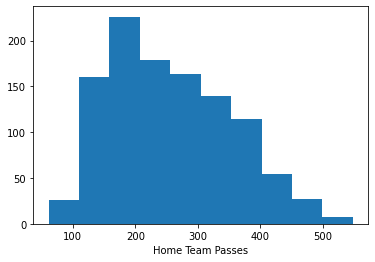

In [70]:
plt.hist(x=X['home_team_passes'])
plt.xlabel('Home Team Passes')

Text(0.5, 0, 'Away Team Passes')

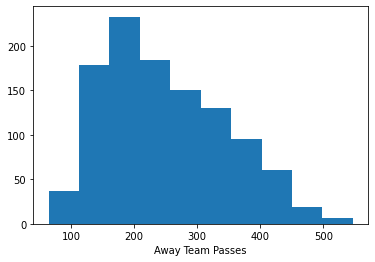

In [74]:
plt.hist(x=X['away_team_passes'])
plt.xlabel('Away Team Passes')

Text(0.5, 0, 'Home Team Shots')

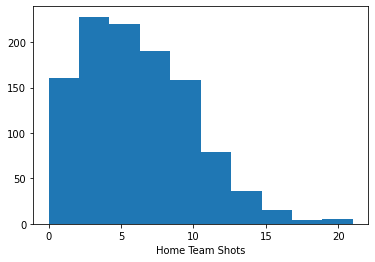

In [76]:
plt.hist(x=X['home_team_shots'])
plt.xlabel('Home Team Shots')

Text(0.5, 0, 'Away Team Shots')

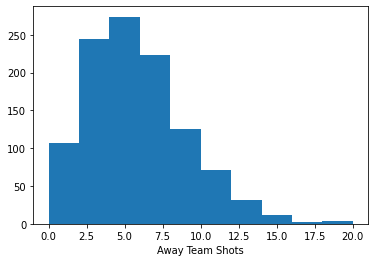

In [77]:
plt.hist(x=X['away_team_shots'])
plt.xlabel('Away Team Shots')

<ipython-input-84-f09ff031b490>:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(X_home['outcome'].value_counts(normalize=True),labels=('0','1','2'),shadow=True )


([<matplotlib.patches.Wedge at 0x7fa8ec31d7c0>,
 [Text(0.15881789570067353, 1.0884745637842026, '0'),
  Text(-0.7001933526649874, -0.8483685925844762, '1'),
  Text(0.9405734635031038, -0.5703696693844929, '2')])

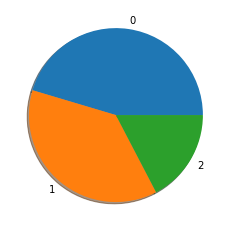

In [84]:
plt.pie(X_home['outcome'].value_counts(normalize=True),labels=('0','1','2'))

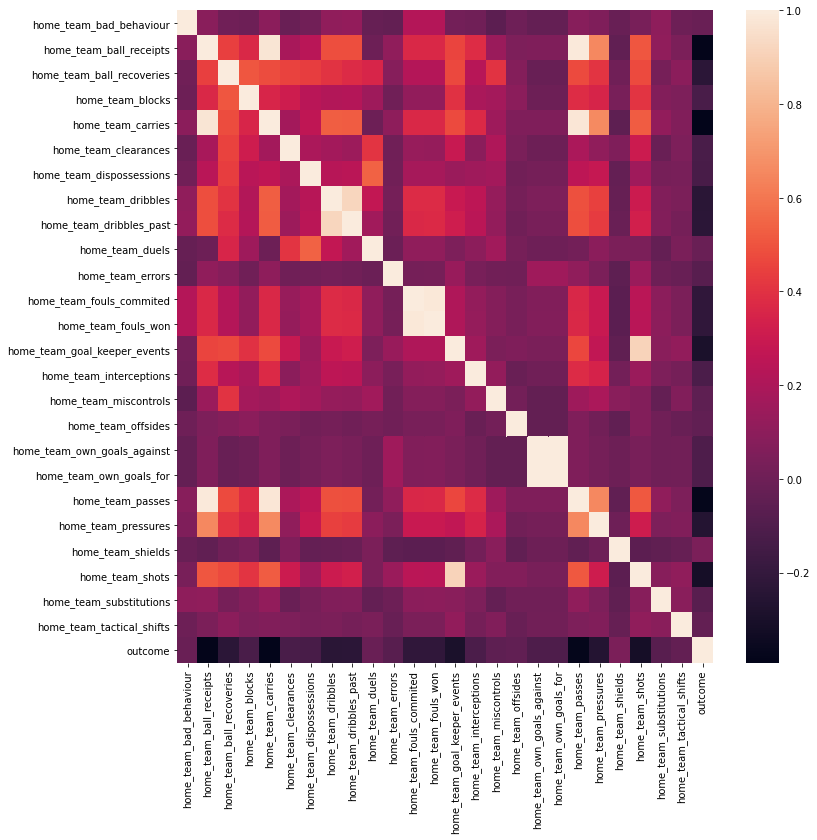

In [64]:
X_home = x_for_heatmap[['home_team_bad_behaviour', 'home_team_ball_receipts',
       'home_team_ball_recoveries', 'home_team_blocks', 'home_team_carries',
       'home_team_clearances', 'home_team_dispossessions',
       'home_team_dribbles', 'home_team_dribbles_past', 'home_team_duels',
       'home_team_errors', 'home_team_fouls_commited', 'home_team_fouls_won',
       'home_team_goal_keeper_events', 'home_team_interceptions',
       'home_team_miscontrols', 'home_team_offsides',
       'home_team_own_goals_against', 'home_team_own_goals_for',
       'home_team_passes', 'home_team_pressures', 'home_team_shields',
       'home_team_shots', 'home_team_substitutions',
       'home_team_tactical_shifts','outcome']]
plt.figure(figsize=(12, 12))
sns.heatmap(X_home.corr(), annot=False)
plt.show()

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(x_for_heatmap.corr(), annot=False)
plt.show()

In [ ]:
sns.pairplot(x_for_heatmap[['home_team_ball_receipts','home_team_carries','home_team_passes','home_team_shots']])
plt.show()

In [ ]:
sns.pairplot(x_for_heatmap[['away_team_ball_receipts','away_team_carries','away_team_passes','away_team_shots']])
plt.show()

In [61]:
# baseline accuracy
df_ult['match_outcome'].value_counts(normalize=True)

0    0.453881
1    0.372603
2    0.173516
Name: match_outcome, dtype: float64

In [ ]:
accuracy_score(y_test,predictions_RF_test)

In [24]:
# target
y = df_ult['match_outcome']

In [25]:
# predictors
X = df_ult[['home_team_bad_behaviour','home_team_ball_receipts','home_team_ball_recoveries',
            'home_team_blocks','home_team_carries','home_team_clearances','home_team_dispossessions',
            'home_team_dribbles','home_team_dribbles_past','home_team_duels','home_team_errors',
            'home_team_fouls_commited','home_team_fouls_won','home_team_goal_keeper_events',
            'home_team_interceptions','home_team_miscontrols','home_team_offsides',
            'home_team_own_goals_against','home_team_own_goals_for','home_team_passes',
            'home_team_pressures','home_team_shields','home_team_shots','home_team_substitutions',
            'home_team_tactical_shifts','away_team_bad_behaviour','away_team_ball_receipts',
            'away_team_ball_recoveries','away_team_blocks','away_team_carries','away_team_clearances',
            'away_team_dispossessions','away_team_dribbles','away_team_dribbles_past','away_team_duels',
            'away_team_errors','away_team_fouls_commited','away_team_fouls_won','away_team_goal_keeper_events',
            'away_team_interceptions','away_team_miscontrols','away_team_offsides','away_team_own_goals_against',
            'away_team_own_goals_for','away_team_passes','away_team_pressures','away_team_shields',
            'away_team_shots','away_team_substitutions','away_team_tactical_shifts']]

In [26]:
# cells with nans become 0 as that event happened 0 times 
X = X.fillna(0)
X.head()

,home_team_bad_behaviour,home_team_ball_receipts,home_team_ball_recoveries,home_team_blocks,home_team_carries,home_team_clearances,home_team_dispossessions,home_team_dribbles,home_team_dribbles_past,home_team_duels,...,away_team_miscontrols,away_team_offsides,away_team_own_goals_against,away_team_own_goals_for,away_team_passes,away_team_pressures,away_team_shields,away_team_shots,away_team_substitutions,away_team_tactical_shifts
0,1.0,139,19,4.0,88,12.0,2.0,6.0,3.0,22,...,10.0,0.0,0.0,0.0,268,109,2.0,6.0,0.0,0.0
1,0.0,322,38,7.0,266,17.0,6.0,16.0,9.0,15,...,1.0,0.0,0.0,0.0,181,78,0.0,4.0,0.0,0.0
2,0.0,161,38,10.0,145,20.0,6.0,9.0,6.0,21,...,11.0,0.0,0.0,0.0,211,61,0.0,7.0,0.0,0.0
3,0.0,317,39,10.0,292,18.0,12.0,10.0,5.0,18,...,6.0,0.0,0.0,0.0,174,46,0.0,1.0,0.0,0.0
4,0.0,347,43,11.0,335,18.0,11.0,14.0,7.0,24,...,4.0,0.0,0.0,0.0,190,59,0.0,4.0,0.0,0.0


In [27]:
# create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y, test_size=0.3, random_state=1)

In [29]:
# standardise predictors
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [30]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [31]:
# logistic regression model optimised by gridsearch
model_LogR = LogisticRegression(solver='liblinear', multi_class='ovr')

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs_LogR = GridSearchCV(estimator=model_LogR,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs_LogR.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs_LogR.best_params_)
print('Best estimator C:')
print(gs_LogR.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs_LogR.best_score_)
print('Best estimator score on the full training set:')
print(gs_LogR.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs_LogR.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs_LogR.best_estimator_.coef_)

Best Parameters:
{'C': 0.046415888336127774, 'fit_intercept': True, 'penalty': 'l1'}
Best estimator C:
0.046415888336127774
Best estimator mean cross validated training score:
0.6696715049656227
Best estimator score on the full training set:
0.6723237597911227
Best estimator score on the test set:
0.6990881458966566
Best estimator coefficients:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   4.50212338e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.40637959e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.25458292e-02  1.48605612e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.43795891e-04  1.51757467e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.03931839e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.20844998e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.43679497e-01  0.000000

In [32]:
model_DTC = DecisionTreeClassifier(max_depth=3)
model_DTC.fit(X_train, y_train)

print(model_DTC.score(X_train, y_train))
print(cross_val_score(model_DTC, X_train, y_train, cv=5).mean())
print(model_DTC.score(X_test, y_test))

0.6906005221932114
0.6500806383159323
0.6595744680851063


In [33]:
model_rand_for = RandomForestClassifier(n_estimators=7500,max_features=40,max_depth=7,min_samples_leaf=7)
model_rand_for.fit(X_train, y_train)

print(model_rand_for.score(X_train, y_train))
print(cross_val_score(model_rand_for, X_train, y_train, cv=5).mean())
print(model_rand_for.score(X_test, y_test))

0.7859007832898173
0.6513708513708514
0.6930091185410334


In [34]:
model_rand_for = RandomForestClassifier()
model_rand_for.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
params = {'max_features': range(1,50,5),
          'max_depth': range(1,10,1),
          'min_samples_leaf': range(1,10,1)}

model_rand_for = RandomForestClassifier()
gs_RF = GridSearchCV(estimator=model_rand_for,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs_RF.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs_RF.best_params_)
print('Best estimator mean cross validated training score:')
print(gs_RF.best_score_)
print('Best estimator score on the full training set:')
print(gs_RF.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs_RF.score(X_test, y_test))

Best Parameters:
{'max_depth': 7, 'max_features': 41, 'min_samples_leaf': 3}
Best estimator mean cross validated training score:
0.6696545284780578
Best estimator score on the full training set:
0.8381201044386423
Best estimator score on the test set:
0.6747720364741642


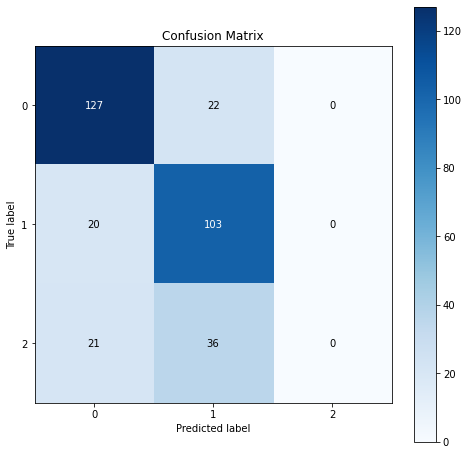

In [48]:
predictions_LogR_train = gs_LogR.predict(X_train)
predictions_LogR_test = gs_LogR.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, predictions_LogR_test, labels=[0,1,2], figsize=(8, 8))
plt.show()

In [38]:
y_test.shape

(329,)

In [49]:
print(classification_report(y_test, predictions_LogR_test))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       149
           1       0.64      0.84      0.73       123
           2       0.00      0.00      0.00        57

    accuracy                           0.70       329
   macro avg       0.47      0.56      0.51       329
weighted avg       0.58      0.70      0.63       329



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


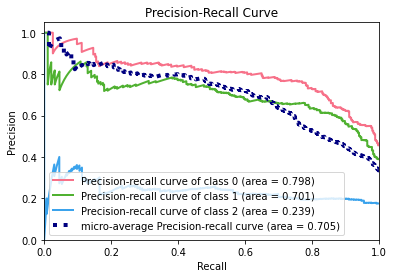

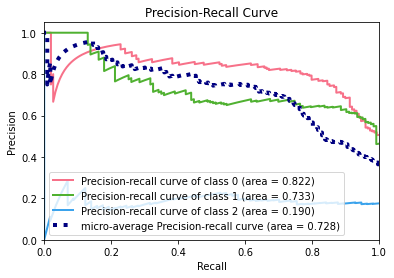

In [50]:
probabilities_train = gs_LogR.predict_proba(X_train)
probabilities_test = gs_LogR.predict_proba(X_test)

skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()

skplt.metrics.plot_precision_recall(y_test, probabilities_test, cmap=cmap)
plt.show()

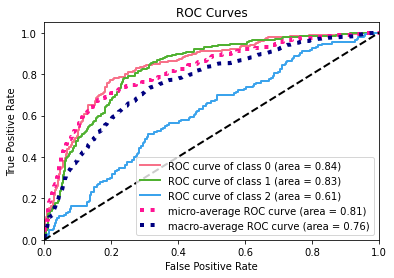

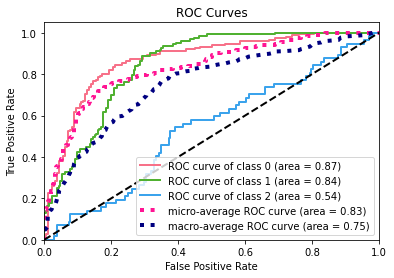

In [51]:
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()
skplt.metrics.plot_roc(y_test, probabilities_test, cmap=cmap)
plt.show()

In [59]:
gs_LogR.best_estimator_.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

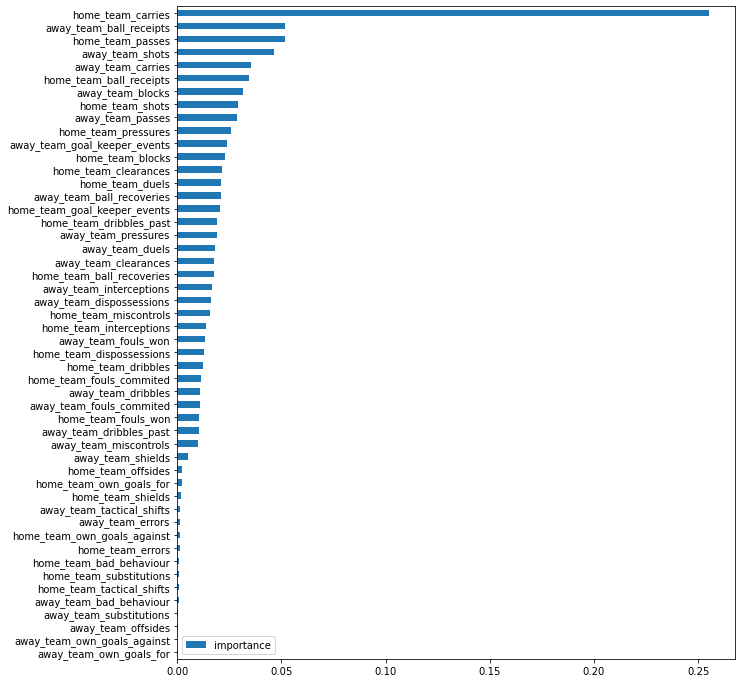

In [60]:
pd.DataFrame(gs_RF.best_estimator_.feature_importances_,
             columns=['importance'],
             index=X.columns
             ).sort_values(by='importance', ascending=True
                           ).plot(kind='barh', figsize=(10, 12))
plt.show()

In [46]:
# knn model

model_KNN = KNeighborsClassifier(n_neighbors=12)
model_KNN.fit(X_train,y_train)
predictions = model_KNN.predict(X_test)
cv_scores_knn = cross_val_score(model_KNN, X_test, y_test, cv=5)
print(model_KNN.score(X_train, y_train))
print(cv_scores_knn.mean())
print(accuracy_score(predictions,y_test))

0.6762402088772846
0.693100233100233
0.6717325227963525


In [47]:
# bayes model

model_NB = naive_bayes.BernoulliNB()
model_NB.fit(X_train, y_train)
print(model_NB.score(X_train,y_train))
print(cross_val_score(model_NB, X_test, y_test).mean())
print(model_NB.score(X_test,y_test))

0.6514360313315927
0.6566433566433567
0.6717325227963525
